# <u>Created a database named banking_project.

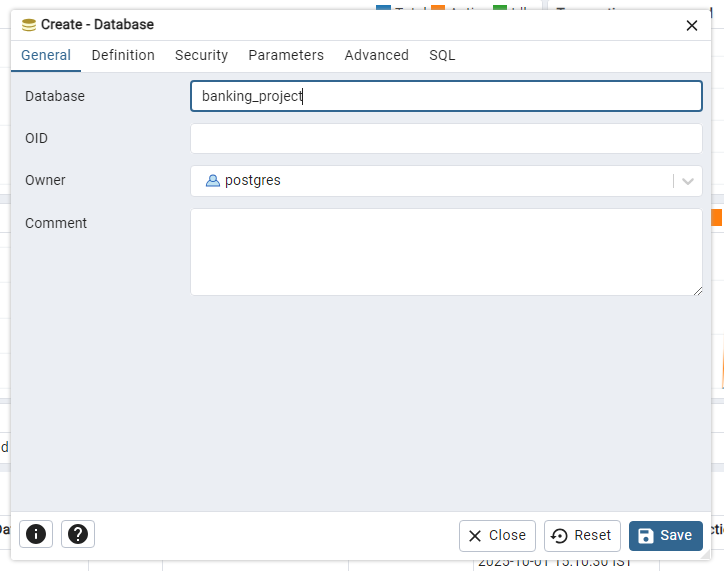

---

# <u>Created an empty table with the cloumns that match up the .csv file columns.

```sql
CREATE TABLE customers (
    "Client ID" VARCHAR(20),
    "Name" VARCHAR(100),
    "Age" INT,
    "Location ID" INT,
    "Joined Bank" DATE,
    "Banking Contact" VARCHAR(100),
    "Nationality" VARCHAR(50),
    "Occupation" VARCHAR(100),
    "Fee Structure" VARCHAR(20),
    "Loyalty Classification" VARCHAR(50),
    "Estimated Income" NUMERIC(30, 4),
    "Superannuation Savings" NUMERIC(30, 4),
    "Amount of Credit Cards" INT,
    "Credit Card Balance" NUMERIC(30, 4),
    "Bank Loans" NUMERIC(30, 4),
    "Bank Deposits" NUMERIC(30, 4),
    "Checking Accounts" NUMERIC(30, 4),
    "Saving Accounts" NUMERIC(30, 4),
    "Foreign Currency Account" NUMERIC(30, 4),
    "Business Lending" NUMERIC(30, 4),
    "Properties Owned" INT,
    "Risk Weighting" INT,
    "BRId" INT,
    "GenderId" INT,
    "IAId" INT
);
```

### Importing data from the .csv file.

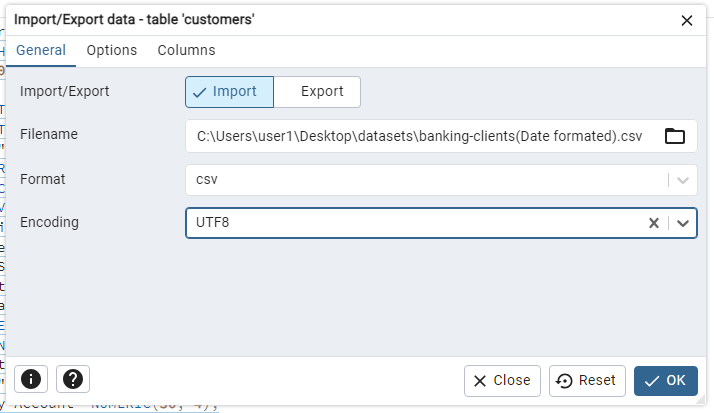

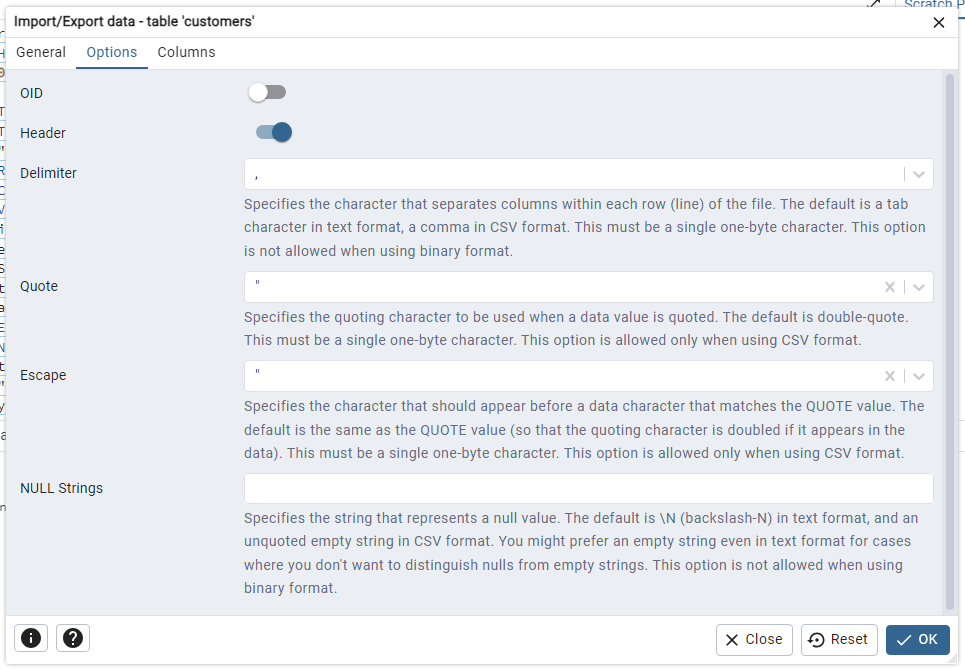

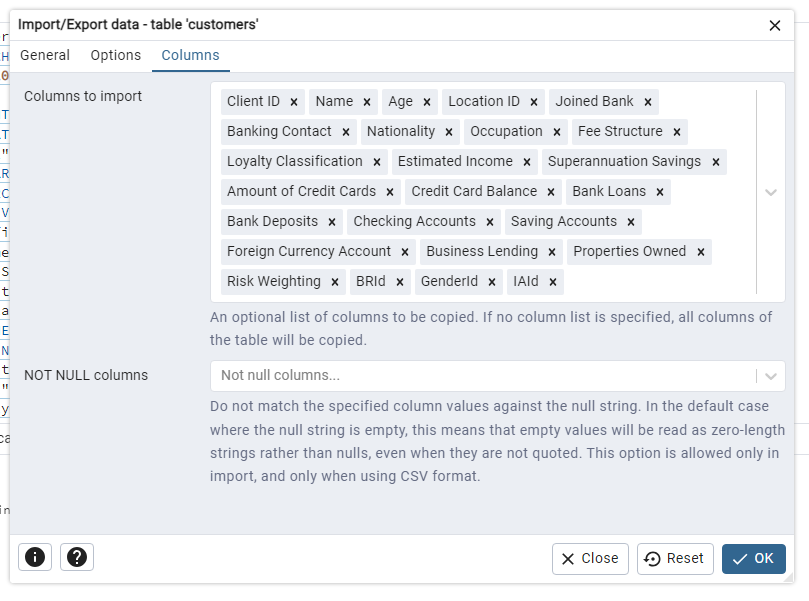

- <u>NOTE:

  I had to format the cells of Joined Bank column to Date format: yyyy-mm-dd, so that PostgreSQL won't put out an error since it follows yyyy-mm-dd format.

***Querying for all the columns in the customers table:***

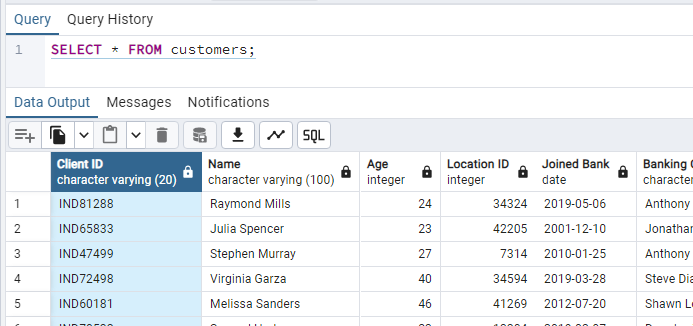

### Similarly i can create empty tables for the other .csv files and import data from .csv, these tables shows relationships to the main table:

```sql
CREATE TABLE banking_relationships(
	"BRId" INT,
	"Banking Relationship" VARCHAR(20)
);
```

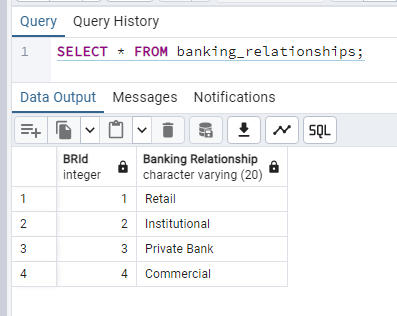

```sql
CREATE TABLE gender_relationships(
	"GenderId" INT,
	"Gender" VARCHAR(20)
);
```

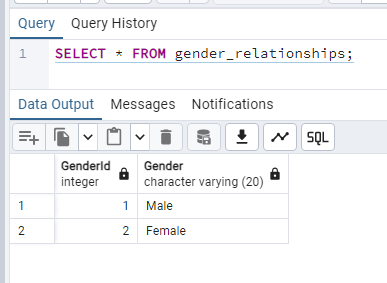

```sql
CREATE TABLE investment_advisors(
	"IAId" INT,
	"Investment Advisor" VARCHAR(50)
);
```

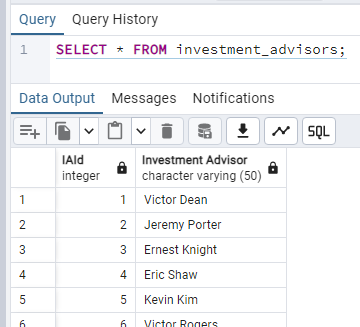

---

# <u>Alternatively we can use Python pandas to import data from .csv files to SQL database banking_project.

### Reading banking-clients.csv and saving it to a variable banking_dataset :

In [1]:
import pandas as pd

In [3]:
pwd

'C:\\Users\\user1\\Desktop\\Project SQL Query'

In [4]:
banking_dataset = pd.read_csv("C://Users//user1//Desktop/datasets/banking-clients.csv")

In [7]:
# Checking the first five rows.

banking_dataset.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


### Writing banking_dataset to SQL:

In [11]:
from sqlalchemy import create_engine

In [12]:
# Fill in my PostgreSQL details

user = 'postgres'
password = 'ducati1200'
host = 'localhost'   # or the server IP
port = '5432'        # default PostgreSQL port
database = 'banking_project'

In [13]:
# Create SQLAlchemy engine

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

In [14]:
# We already have 'engine' created with SQLAlchemy
# and 'banking_dataset' is our DataFrame.

banking_dataset.to_sql(
    name = 'banking_clients',     # table name in the database # case sensitive
    con = engine,                 # SQLAlchemy engine
    if_exists = 'fail',           # options: 'fail', 'replace', 'append'
    index = False)                # do not write DataFrame index as a column

1000

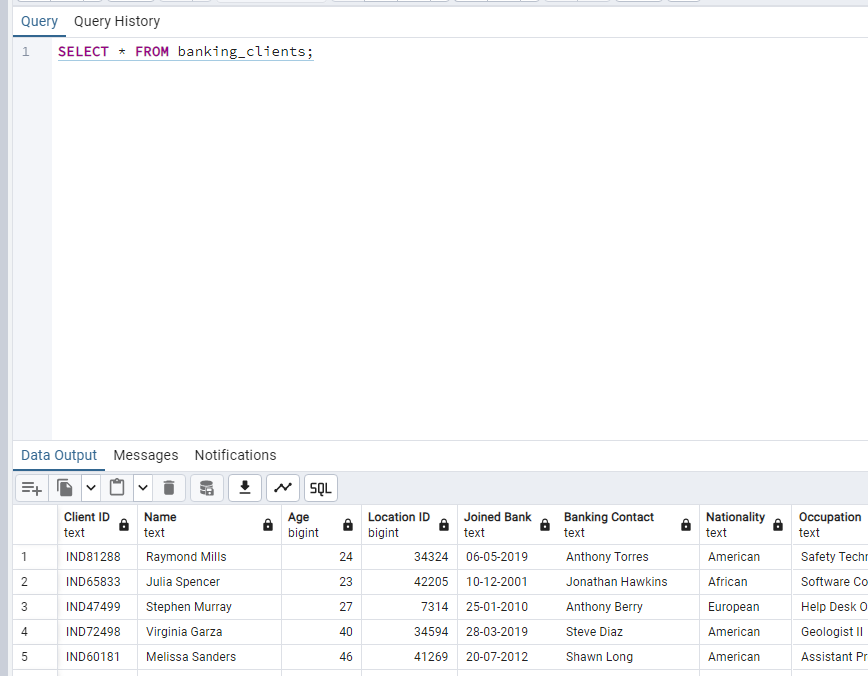

### Reading banking-realtionships.csv and saving it to a variable banking_relationships:

In [19]:
banking_relationships = pd.read_csv("C://Users//user1//Desktop//datasets/banking-realtionships.csv")

In [20]:
banking_relationships.head()

,BRId,Banking Relationship
0,1,Retail
1,2,Institutional
2,3,Private Bank
3,4,Commercial


### Writing banking_relationships dataset / DataFrame  to SQL:

In [24]:
# We already have 'engine' created with SQLAlchemy
# and 'banking_relationships' is our DataFrame.

banking_relationships.to_sql(
    name = 'banking_relationships',     # table name in the database # case sensitive
    con = engine,                       # SQLAlchemy engine
    if_exists = 'fail',                 # options: 'fail', 'replace', 'append'
    index = False)                      # do not write DataFrame index as a column

4

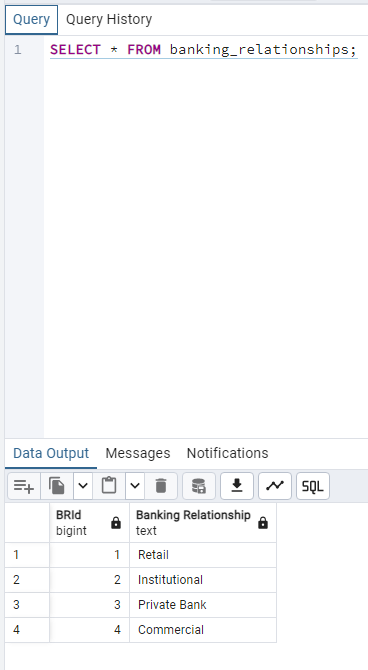

### Reading gender.csv and saving it to a variable gender_relationships:

In [22]:
gender_relationships = pd.read_csv("C://Users//user1//Desktop//datasets/gender.csv")

In [23]:
gender_relationships.head()

,GenderId,Gender
0,1,Male
1,2,Female


### Writing gender_relationships dataset / DataFrame  to SQL:

In [25]:
# We already have 'engine' created with SQLAlchemy
# and 'gender_relationships' is our DataFrame.

gender_relationships.to_sql(
    name = 'gender_relationships',     # table name in the database # case sensitive
    con = engine,                       # SQLAlchemy engine
    if_exists = 'fail',                 # options: 'fail', 'replace', 'append'
    index = False)  

2

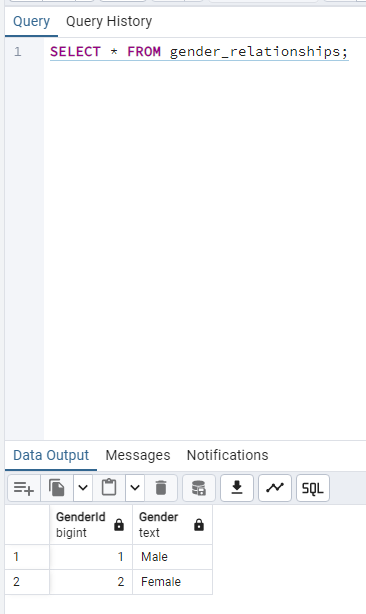

### Reading investment-advisiors.csv and saving it to a variable investment_advisors:

In [29]:
investment_advisors = pd.read_csv("C://Users//user1//Desktop//datasets/investment-advisiors.csv")

In [30]:
investment_advisors.head()

,IAId,Investment Advisor
0,1,Victor Dean
1,2,Jeremy Porter
2,3,Ernest Knight
3,4,Eric Shaw
4,5,Kevin Kim


### Writing investment_advisors dataset / DataFrame  to SQL:

In [31]:
# We already have 'engine' created with SQLAlchemy
# and 'investment_advisors' is our DataFrame.

investment_advisors.to_sql(
    name = 'investment_advisors',      # table name in the database # case sensitive
    con = engine,                       # SQLAlchemy engine
    if_exists = 'fail',                 # options: 'fail', 'replace', 'append'
    index = False)  

22

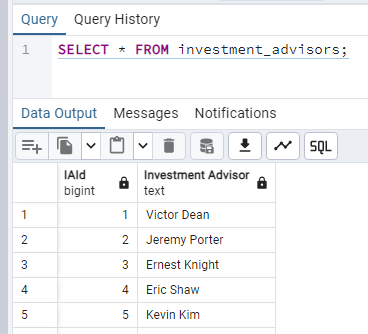

---